In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
#read the data
data = pd.read_csv('iriss.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
#view top 5 data
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#last 5 data
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
#random sample
data.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
139,6.9,3.1,5.4,2.1,Iris-virginica


In [18]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
data.shape()

TypeError: 'tuple' object is not callable

In [20]:
data.shape

(150, 5)

In [21]:
X = data.drop(columns=['Species'])
print("Shape of X = ",X.shape)

Shape of X =  (150, 4)


In [22]:
y = data['Species']
print("Shape of y = ",y.shape)

Shape of y =  (150,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (120, 4)
Shape of y_train (120,)
Shape of X_test (30, 4)
Shape of y_test (30,)


In [25]:
# kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_out = knn.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100,"%")

Accuracy is  100.0 %


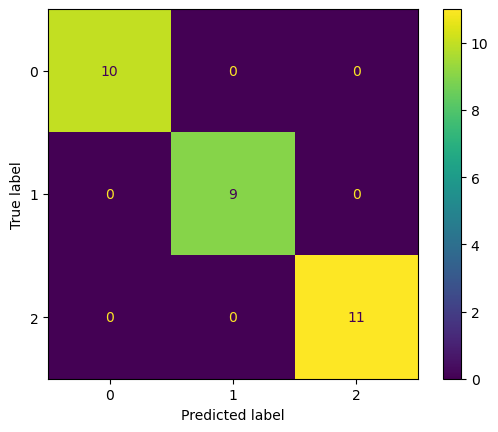

In [26]:
cm = confusion_matrix(y_true=y_test, y_pred=y_out)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.savefig("cm-dtc.png")

In [20]:
with open('model.pkl', 'wb') as f:
    pickle.dump(knn, f)
print("SUCCESS!")

SUCCESS!


In [27]:
# Descision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_out = dtc.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100, '%')

Accuracy is  100.0 %


In [28]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_out = gnb.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100, '%')

Accuracy is  100.0 %


In [31]:
# ANN
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_out = mlp.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100, '%')

Accuracy is  100.0 %


c:\Users\Ravi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_out = rf.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100, '%')

Accuracy is  100.0 %
